# Homework 3: Data Frames and Graphs  (50 points)

Please complete this notebook by filling in the cells provided. The solved homework should be uploaded to Canvas.




**Reading**: 

Data8 textbook chapters [5](https://inferentialthinking.com/chapters/05/Sequences.html) and [7.1-7.2](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html).

**Deadline**:

This assignment is due on Thursday, October 20 at 9:00am. Late work will not be accepted unless you have made special arrangements with the instructors.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. CTA (20 points)

This exercise will look at a dataset from the Chicago Transit Authority, `CTA - Ridership - Daily Boarding Totals`, available from the Chicago Data Portal 
https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97 
and downloaded on October 4, 2022

This is a 20-year timeseries of total bus and train utilization. The readme file on this dataset is here:
https://data.cityofchicago.org/api/assets/5175CFDE-CA9A-498C-BB1C-8A86B780CCF1

In [2]:
# specify the correct path to the file and run this
cta= pd.read_csv("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
cta.head(5)

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


In [4]:
# run this cell
type(cta.iloc[0,0])

str

As you see in the output of the above cell, the `service_date` entries are strings. The next cell converts the (string) dates into pandas.datetime format and assigns them to a new column called `Date`. We also show you how to extract the year from the `Date` column (you might need to extract other parts of the date so read the code carefully).

In [5]:
# run this cell
cta['Date']=pd.to_datetime(cta.service_date)
cta['Year'] = cta['Date'].dt.year
cta.tail(5)

,service_date,day_type,bus,rail_boardings,total_rides,Date,Year
7939,07/27/2022,W,446320,340006,786326,2022-07-27,2022
7940,07/28/2022,W,448728,380517,829245,2022-07-28,2022
7941,07/29/2022,W,430804,378849,809653,2022-07-29,2022
7942,07/30/2022,A,304052,327388,631440,2022-07-30,2022
7943,07/31/2022,U,224307,252781,477088,2022-07-31,2022


The `datetime` data format has other useful features with some more illustrated in the cell below for the last date in the dataset.


In [6]:
# run this cell
[cta.Date[7943].year,cta.Date[7943].month, cta.Date[7943].day, cta.Date[7943].dayofweek]

[2022, 7, 31, 6]

**Question 1**. What period of time does the dataset cover (dates are ordered)? Calculate the number of days in that period. 

In [28]:
# calculation here
[cta.Date[0].year, cta.Date[0].month, cta.Date[0].day, cta.Date[0].dayofweek]
days_in_period = 21*365+5+31+28+31+30+31+30+31
days_in_period

7882

**Question 2** How many rows does the dataset have?  Are any dates missing?


In [27]:
# code here
len(cta.Date)
print("The dataset has 7944 rows")

The dataset has 7944 rows


0

*Answer here:* The Dataset has 7944 rows. There are no dates missing but there are duplicate entries. 

**Question 3** Generate a line plot of CTA total_rides for the **past five years** (since 01/01/2022).

<AxesSubplot:xlabel='Date'>

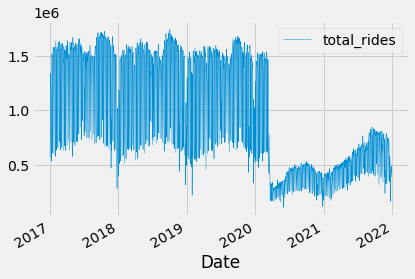

In [40]:
# code here
past = cta[cta['Year'] >2016]
past_five = past[past['Year']<2022]
#cta['past_five'] = past_five
past_five.plot.line('Date','total_rides', linewidth=0.5)

**Question 4** Compare total CTA ridership for the months of January in 2019 and 2022.
By approximately how much has ridership fallen from 2019 to 2022? 

In [47]:
# code here
nineteen = cta[cta['Year'] == 2019]
twentytwo = cta[cta['Year'] == 2022]
nineteen['total_rides'].mean() - twentytwo['total_rides'].mean()
print("By approximately 614607 riders")

By approximately 614607 riders


**Question 5** Make a scatter plot of train boardings vs. bus ridership.  Comment on the graph.  (What do you see?)  Make sure you add adequate labels. 

<AxesSubplot:title={'center':'Train Boardings vs Bus Ridership'}, xlabel='rail_boardings', ylabel='bus'>

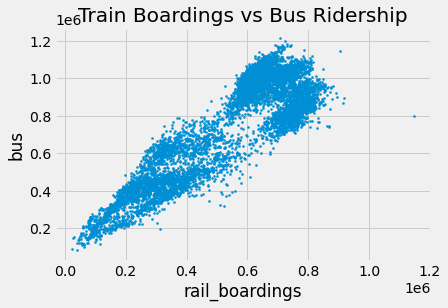

In [52]:
# code here
cta.plot.scatter('rail_boardings', 'bus', title = 'Train Boardings vs Bus Ridership', s=4)

*Answer here:* On average there are more people who take the bus than the rail on a given day, but when public transport is popular both taking the bus and train are common. 

**Question 6** Are there unusual days in the next plot (code provided below)? For the unusual days you find, provide an explanation.
                                                                                          

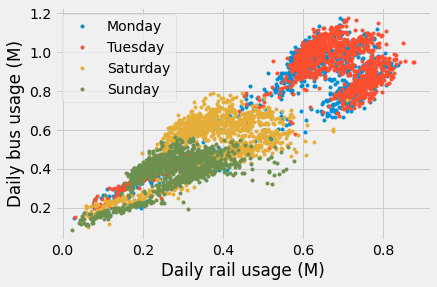

In [53]:
# run this cell
cta["dayofweek"] =cta['Date'].dt.dayofweek
dow = {0:"Monday", 1:"Tuesday", 5:"Saturday", 6:"Sunday"} 
for i in [0,1,5,6]: 
    r = (cta.dayofweek == i)
    plt.plot(cta.rail_boardings[r]/1E6, cta.bus[r]/1e6, '.', label = dow[i])
plt.legend()
plt.xlabel("Daily rail usage (M)")
plt.ylabel("Daily bus usage (M)");

*Answer here:* According to the graph public transit usage is higher on Mondays and Tuesdays than on any other day. 

## 2. Colleges (15 points)


This exercise uses data on colleges from Homework 2. Recall that the dataset was posted on Kaggle at the beginning of 2018, and was grabbed from US-News: https://www.usnews.com. It includes statistics for 311 US Universities. 

To make your tasks easiear, we removed many of the columns and kept only 11. The corresponding file can be found here:

http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv


#### Run the next cell that contains code that will allow you to read the data into a data frame called `colleges_df`. It also shows the first 10 rows.


In [56]:
# Just run this cell.

colleges_df=pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv')
colleges_df.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
5,33.0,1460.0,4524.0,8.0,95.0,58.0,20331.0,49892,Massachusetts Institute of Technology,5,private
6,31.0,1380.0,7034.0,5.0,95.0,47.0,19296.0,49617,Stanford University,5,private
7,32.0,1380.0,10019.0,9.0,93.0,47.0,25441.0,53534,University of Pennsylvania,8,private
8,31.0,1380.0,6609.0,11.0,92.0,41.0,23374.0,53744,Duke University,9,private
9,34.0,1510.0,979.0,8.0,91.0,51.0,23973.0,49908,California Institute of Technology,10,private


**Run the following command that will make a scatterplot of SAT average scores (x-axis) and tuition (y-axis).**

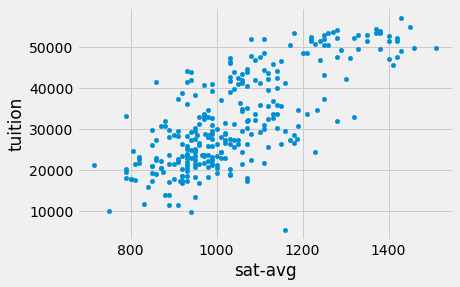

In [57]:
# run this cell
colleges_df.plot.scatter(x='sat-avg',y='tuition');

**Question 1.**  Describe in few words the pattern you see. What is a possible explanation for this pattern?

A possible explanation for this pattern is that students who are willing to spend time studying to get a good SAT score are also willing to spend more money on thier college education.

**Question 2.** Draw a scatterplot of SAT average (x-axis) and 'cost-after-aid' (y-axis) and then describe the pattern you see. Provide an explanation for this pattern.

<AxesSubplot:xlabel='sat-avg', ylabel='cost-after-aid'>

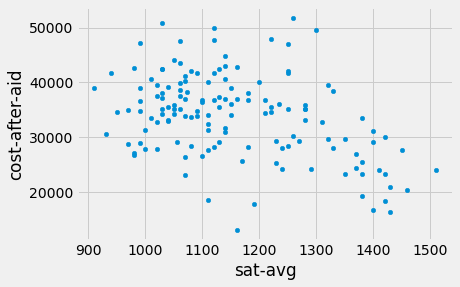

In [59]:
# use this cell for the code that will draw the scatterplot
colleges_df.plot.scatter(x='sat-avg', y='cost-after-aid')


For schools with sat average less than 1300 there doesn't seem to be a correlation between sat average and cost after aid, but past a score of 1300 there's a slight downward trend suggesting that higher level sat average schools cost less after financial aid. This might be because schools that accept students with higher sat scores charge more for regular tuition and can therefore provide more financial aid. 

**Question 3.** Construct a data frame that contains the colleges for which 'percent-receiving-aid' is greater than 0. Call this data frame `aid_df`.

Note that this dataset has missing data points (for example, not all colleges report the percentage of students who receive aid), and the table you created has eliminated the colleges with no information on aid.

In [63]:
aid_df= colleges_df[colleges_df['percent-receiving-aid']>0]
aid_df.head(10)


,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
5,33.0,1460.0,4524.0,8.0,95.0,58.0,20331.0,49892,Massachusetts Institute of Technology,5,private
6,31.0,1380.0,7034.0,5.0,95.0,47.0,19296.0,49617,Stanford University,5,private
7,32.0,1380.0,10019.0,9.0,93.0,47.0,25441.0,53534,University of Pennsylvania,8,private
8,31.0,1380.0,6609.0,11.0,92.0,41.0,23374.0,53744,Duke University,9,private
9,34.0,1510.0,979.0,8.0,91.0,51.0,23973.0,49908,California Institute of Technology,10,private


**Question 4.**  Calculate the proportion of students who receive aid in private universities. Similarly calculate the
proportion of students who receive aid in public universities. (Hint: the answer will not come from directly averaging  the 'percent-receiving-aid' column)

In [72]:
# use this cell to write the code that will output the two numbers
private = aid_df[aid_df['institutionalControl'] == 'private']
pri_aid = 0
for i in private:
    pri_aid = private['enrollment']*private['percent-receiving-aid']/100
private_percent = round(sum(pri_aid)/sum(private['enrollment']),3)
print('Private Percentage: ', private_percent)

public = aid_df[aid_df['institutionalControl']=='public']
pub_aid = 0
for i in public:
    pub_aid = public['enrollment']*public['percent-receiving-aid']/100
public_percent = round(sum(pub_aid)/sum(public['enrollment']),3)
print('Public Percentage: ', public_percent)

Private Percentage:  0.462
Public Percentage:  0.219


**Question 5.** Construct a data frame with two rows (for private and public) and two columns: (i) first column should contain the strings 'public' and 'private'; (ii) second column should contain the percent of students receiving aid that you calculated in Question 4.

In [84]:
# code for constructing the data frame
data = [['public', public_percent], ['private', private_percent]]
cols = ['school_type', 'percent_aid']
ratio = pd.DataFrame(data, columns = cols)
ratio.head()

,school_type,percent_aid
0,public,0.219
1,private,0.462


**Question 6.** Make a bar chart that shows the aid information in the table you created for  Question 5.

**Note:** Graphs aren't very useful without accurate labels.  

<AxesSubplot:title={'center':'Comparing % of Students Receiving Aid in Private and Public Schools'}, xlabel='school_type'>

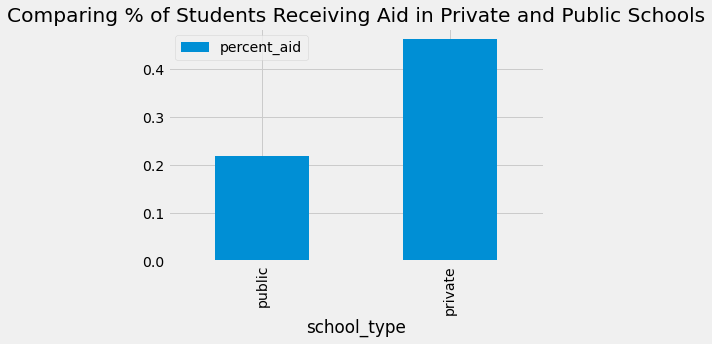

In [96]:
# the bar chart
ratio.plot.bar(x = 'school_type', y = 'percent_aid',title='Comparing % of Students Receiving Aid in Private and Public Schools')


## 3. Seattle Public Library Circulation (15 points)
For this exercise we use a dataset, dating to 2005, of titles checked out at the Seattle Public Library. Since this dataset is voluminous, we have taken a random sample of 1/1000 of the data without replacement.   This dataset is distrubted from the Seattle Open Data Portal: 
https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6

You can read about the origin of the dataset Walsh, Melanie "Where is all the Book Data?"  2022-10-04  https://www.publicbooks.org/where-is-all-the-book-data/ at publicbooks.org.

In [118]:
spl_df= pd.read_csv("http://www.stat.uchicago.edu/~nicolae/118/Checkouts.sample.csv")
spl_df.head(3)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,VIDEODISC,2016,4,1,"JammX kids. Adventure one, Can't dance don't w...",NaN,NaN,"Dance parties Juvenile drama, Hip hop Juvenile...",Lightforce Entertainment ; Distributed by Warn...,2006.
1,Digital,Hoopla,TELEVISION,2016,4,2,Dogs Decoded,NaN,NaN,Science,PBS,NaN
2,Digital,OverDrive,EBOOK,2016,4,1,"Hunter's Oath: Sacred Hunt Series, Book 1",NaN,Michelle West,"Fantasy, Fiction","Penguin Group (USA), Inc.",2013


**Question 1**  Make a bar chart of the total number of items checked out by year (here we count number of items, so the entry in second row is counted once). Comment on the values in 2005, 2020, and 2022.

The number of items checked out in 2005, 2020, and 2022 is less than that of almost any other year.


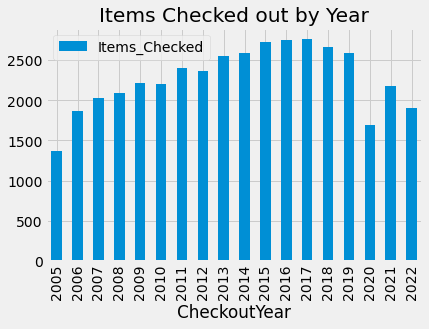

In [146]:
# code here
byyear = spl_df.groupby('CheckoutYear').count()[['UsageClass']]
byyear = byyear.rename(columns={'CheckoutYear': 'Year', 'UsageClass': 'Items_Checked'})
byyear.plot.bar(title= 'Items Checked out by Year')
print("The number of items checked out in 2005, 2020, and 2022 is less than that of almost any other year.")

**Question 2** How did the pandemic interact with long-term trends in library / media 
consumption?  Using the data in the column `UsageClass` make a line graph plot that has two line trends, one for "DIGITAL" and one for "PHYSICAL". Comment on the trends you see in the graph. 	

<AxesSubplot:title={'center':'Digital V.S. Physical Items Checked Out'}>

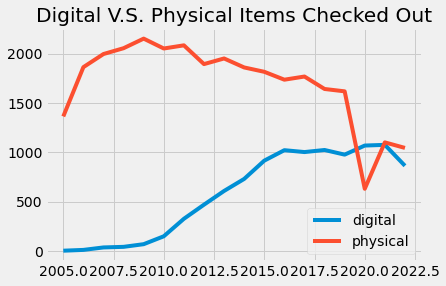

In [212]:
# code here
byusage = spl_df.groupby('UsageClass')
digital = spl_df.query('UsageClass == "Digital"')
digital_by_year = digital.groupby('CheckoutYear').count()[['Title']]
num_digital = digital_by_year['Title']
physical = spl_df.query('UsageClass == "Physical"')
physical_by_year = physical.groupby('CheckoutYear').count()[['Title']]
num_physical = physical_by_year['Title']
together = pd.DataFrame({'digital': num_digital,
                         'physical': num_physical}, index=range(2005,2023))
together.plot.line(title = 'Digital V.S. Physical Items Checked Out')

*Answer here:* The pandemic saw a sharp decrease in the amount of physical items being checked out at the library and a slight increase in the amount of digital items checked out. Overall the number of items being checked out at the library decreased because of the pandemic. 

**Question 3** We would like to see if there is some clarification on the trends in Question 2 that come from the data in column `MaterialType`. Make a line graph of BOOK, AUDIOBOOK, EBOOK, and VIDEODISK checkouts and comment on the general trends in the graph.

<AxesSubplot:title={'center':'Checkouts by Type'}, xlabel='CheckoutYear'>

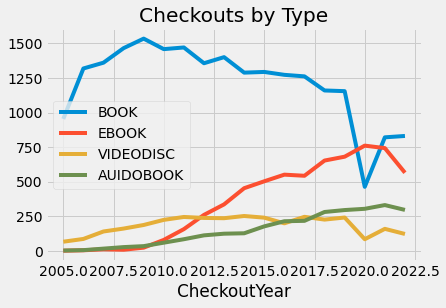

In [213]:
# code here
book = spl_df.query('MaterialType=="BOOK"').groupby('CheckoutYear').count()
ebook = spl_df.query('MaterialType=="EBOOK"').groupby('CheckoutYear').count()
video = spl_df.query('MaterialType=="VIDEODISC"').groupby('CheckoutYear').count()
audio = spl_df.query('MaterialType=="AUDIOBOOK"').groupby('CheckoutYear').count()
by_type = pd.DataFrame({'BOOK': book['Title'], 
                        'EBOOK': ebook['Title'],
                        'VIDEODISC': video['Title'],
                        'AUIDOBOOK': audio['Title']})
by_type.plot.line(title = 'Checkouts by Type')

*Answer here:* The drop in physical items checked out correlates with the drop in physical books and videodiscs checked out. This is matched by an increase in the number of ebooks checked out and a slight increase in the number of Audiobooks checked out.